# Netflix Exploratory Data Analysis

![](https://images.squarespace-cdn.com/content/v1/599bbf76914e6bb960c6d0bb/1570094672119-ZKYXULH7KGAG1EXODHNE/netflix-logo.gif?format=1000w)

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


# Project Outline


1. Downloading dataset and uploading CSV files to Jupyter Notebook.
2. Data Preprocessing 
3. Data Visualization
4. Asking Questions
5. Insights
6. Business Recommendations

# Downloading the Dataset

**TODO** - Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


In [1]:
!pip install jovian pandas-profiling numpy plotly --upgrade --quiet

^C


In [3]:
!pip install jovian opendatasets --upgrade --quiet
!pip install kaggle

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/shivamb/netflix-shows' 

to add kaggle id i have uploaded kaggle.json file using open option of File and now it is running

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\netflix-shows" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
# our directory
data_dir = './netflix-shows'

In [5]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "Neflix EDA and recommondation" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tripti-bhati02/neflix-eda-and-recommondation" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/tripti-bhati02/neflix-eda-and-recommondation


'https://jovian.com/tripti-bhati02/neflix-eda-and-recommondation'

# Data Preparation and Cleaning

![image.png](https://i.imgur.com/BiXEFMw.png)


In [10]:
import pandas as pd
import numpy as np
from IPython.display import Image 

In [11]:
df=pd.read_csv('./netflix-shows/netflix_titles.csv')

Now we need to check basic information about our dataset such as:
1. head and tail i.e. first and last few rows of our dataset
2. info
3. shape
4. columns
5. column wise total count of null values

Let us check first 10 and last 10 rows of dataset

In [12]:
df.head() #due to single cell only tail dataset will display
df.tail()

show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R     88 min   
8805   January 11, 2020          2006     PG     88 min   
8806      March 2, 2019          2015  TV-14    111 min   

                                           listed_in  \
8802                  Cult Movies, Dramas, Thrillers   
8803          Kids' TV, Korean TV Shows, TV Comedies   
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...

# To get the basic information about dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 447.3+ KB


# To get the dimensions of dataset

In [14]:
df.shape

(8807, 12)

This shows there are 8807 columns and 12 rows in the Netflix Dataset

# To get the headers of dataset

In [15]:
df.columns  

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Data Cleaning


#### Check Duplicates 

In [16]:
# Checking for Duplicates !!

duplicate=df.duplicated().sum() #without sum columnwise duplicate will be displayed 
duplicate

0

Here in our data set we have no duplicate values.... but if we would have any then ?????

![thinking.jfif](https://i.imgur.com/WdqXEVJ.png)


We can drop the duplicates by the following code written in comments format...

In [17]:
# DataFrame.drop_duplicates(subset=column_name, keep=’first’, inplace=True)

#### Checking for unique values in column To get column wise count of unique value

In [18]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# To check whether dataset contains null value

In [19]:
df.isnull()

show_id   type  title  director   cast  country  date_added  \
0       False  False  False     False   True    False       False   
1       False  False  False      True  False    False       False   
2       False  False  False     False  False     True       False   
3       False  False  False      True   True     True       False   
4       False  False  False      True  False    False       False   
...       ...    ...    ...       ...    ...      ...         ...   
8802    False  False  False     False  False    False       False   
8803    False  False  False      True   True     True       False   
8804    False  False  False     False  False    False       False   
8805    False  False  False     False  False    False       False   
8806    False  False  False     False  False    False       False   

      release_year  rating  duration  listed_in  description  
0            False   False     False      False        False  
1            False   False     False      False        False  
2            False   False     False      False        False  
3            False   False     False      False        False  
4            False   False     False      False        False  
...            ...     ...       ...        ...          ...  
8802         False   False     False      False        False  
8803         False   False     False      False        False  
8804         False   False     False      False        False  
8805         False   False     False      False        False  
8806         False   False     False      False        False  

[8807 rows x 12 columns]

####    Checking count of null values in the dataset columnwise

In [20]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Deleting row/column containing only/all null values**

In [21]:
df=df.dropna(how="all")
df=df.dropna(how="all",axis=1)
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

 **drop rows having null values in specific column** 

In [22]:
df=df.dropna(subset=["date_added","rating","duration"]) 
df.shape

(8790, 12)

**drop rows if cast & director both contain NA** 

Also putting it in a new dataframe

In [23]:
df1=df.dropna(subset=["cast","director"],how="all")# if cast AND director both contain NA
df1.shape

(8438, 12)

**Drop null values if specific count of not null value is not found**

*Thresh argument that specifies the number of non-missing values that should be present for each row in order not to be dropped.*

In [24]:
df1=df.dropna(thresh=len(df.columns)-1) #thresh=no. of not null values that should present in row or column(axis=1)
df1.shape

(8069, 12)

In [25]:
df1

show_id     type                 title         director  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show         Blood & Water              NaN   
2         s3  TV Show             Ganglands  Julien Leclercq   
4         s5  TV Show          Kota Factory              NaN   
5         s6  TV Show         Midnight Mass    Mike Flanagan   
...      ...      ...                   ...              ...   
8801   s8802    Movie               Zinzana  Majid Al Ansari   
8802   s8803    Movie                Zodiac    David Fincher   
8804   s8805    Movie            Zombieland  Ruben Fleischer   
8805   s8806    Movie                  Zoom     Peter Hewitt   
8806   s8807    Movie                Zubaan      Mozez Singh   

                                                   cast  \
0                                                   NaN   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                           country          date_added  release_year rating  \
0                    United States  September 25, 2021          2020  PG-13   
1                     South Africa  September 24, 2021          2021  TV-MA   
2                              NaN  September 24, 2021          2021  TV-MA   
4                            India  September 24, 2021          2021  TV-MA   
5                              NaN  September 24, 2021          2021  TV-MA   
...                            ...                 ...           ...    ...   
8801  United Arab Emirates, Jordan       March 9, 2016          2015  TV-MA   
8802                 United States   November 20, 2019          2007      R   
8804                 United States    November 1, 2019          2009      R   
8805                 United States    January 11, 2020          2006     PG   
8806                         India       March 2, 2019          2015  TV-14   

       duration                                          listed_in  \
0        90 min                                      Documentaries   
1     2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
2      1 Season  Crime TV Shows, International TV Shows, TV Act...   
4     2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
5      1 Season                 TV Dramas, TV Horror, TV Mysteries   
...         ...                                                ...   
8801     96 min            Dramas, International Movies, Thrillers   
8802    158 min                     Cult Movies, Dramas, Thrillers   
8804     88 min                            Comedies, Horror Movies   
8805     88 min                 Children & Family Movies, Comedies   
8806    111 min     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
4     In a city of coaching centers known to train I...  
5     The arrival of a charismatic young priest brin...  
...                                                 ...  
8801  Recovering alcoholic Talal wakes up inside a s...  
8802  A political cartoonist, a crime reporter and a...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8069 rows x 12 columns]

#### Checking and filling null values with suitable value

**% of null values**

In [26]:
df.isnull().sum()/len(df.index)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.817975
cast             9.385666
country          9.431172
date_added       0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

# To replace all null values by "unknown"

In [27]:
df.fillna("unknown",inplace=True) # To deal with all nan values in dataframes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 515.0+ KB


C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### Changing the type

#### To change name and string(object) data type to category if any value is repeated in that specific column

In [28]:
df.rename(columns={"show_id":"id","listed_in":"category"},inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


# To check data_type of each column

In [29]:
df.dtypes

id              object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
category        object
description     object
dtype: object

As it contains almost columns of object type which contains more memory so we can change data type of few columns into more accurate and less memory needed data-type

In [30]:
df["country"]=df["country"].astype("category")
df["type"]=df["type"].astype("category")
df["category"]=df["category"].astype("category")
df["release_year"]=df["release_year"].astype("int32")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            8790 non-null   object  
 1   type          8790 non-null   category
 2   title         8790 non-null   object  
 3   director      8790 non-null   object  
 4   cast          8790 non-null   object  
 5   country       8790 non-null   category
 6   date_added    8790 non-null   object  
 7   release_year  8790 non-null   int32   
 8   rating        8790 non-null   object  
 9   duration      8790 non-null   object  
 10  category      8790 non-null   category
 11  description   8790 non-null   object  
dtypes: category(3), int32(1), object(8)
memory usage: 441.9+ KB


C:\Users\hp\AppData\Local\Temp/ipykernel_19260/3300940631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"]=df["country"].astype("category")
C:\Users\hp\AppData\Local\Temp/ipykernel_19260/3300940631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["type"]=df["type"].astype("category")
C:\Users\hp\AppData\Local\Temp/ipykernel_19260/3300940631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Now as we can compare, earlier we were using object data type for most of the values and the size of dataframe was------- but now it is reduced to----



#### We can also Change type of multiple column simultaneously like this
df = df.astype({
    'date_start': 'datetime64',
    'date_end': 'datetime64'
})

#### Check the correctness of values filled; for this we need to check all the unique values each of column contains

In [31]:
df["cast"].unique()

array(['unknown',
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)

In [32]:
df["type"].unique()

['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']

In [33]:
df["id"].unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [34]:
df["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [35]:
df["country"].unique()

['United States', 'South Africa', 'unknown', 'India', 'United States, Ghana, Burkina Faso, United Ki..., ..., 'Russia, Spain', 'Croatia, Slovenia, Serbia, Montenegro', 'Japan, Canada', 'United States, France, South Korea, Indonesia', 'United Arab Emirates, Jordan']
Length: 749
Categories (749, object): [', France, Algeria', ', South Korea', 'Argentina', 'Argentina, Brazil, France, Poland, Germany, D..., ..., 'Vietnam', 'West Germany', 'Zimbabwe', 'unknown']

In [36]:
df["date_added"].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [37]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [38]:
df["rating"]=df["rating"].replace(["UR","NR"],"Not Rated")

C:\Users\hp\AppData\Local\Temp/ipykernel_19260/1510439545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"]=df["rating"].replace(["UR","NR"],"Not Rated")


As our rating column contains some values(UR=Unrated, NR=Not rated) that shouldn't part of the same. hence we have replaced them with Not rated that increases readability of our dataset


In [39]:
# we can check two or than two column values using for loop like this

col=df[["duration","category"]]
for i in col:
    print(df[i].unique())

['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min' '68 min' '66 min' '62 min' '74 min' '131 min' '39 min'
 '46 m

Here as we can see some values in duration contains Season as value so we need to replace them all using replace method.This column should have numeric values so we have replaced seasons value with 0

In [40]:
df["duration"]=df["duration"].replace(["2 Seasons","1 Season", "3 Seasons","9 Seasons","4 Seasons","5 Seasons","6 Seasons","7 Seasons","8 Seasons","10 Seasons","11 Seasons","12 Seasons","13 Seasons","14 Seasons","15 Seasons","16 Seasons","17 Seasons"],0)

C:\Users\hp\AppData\Local\Temp/ipykernel_19260/2428382465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["duration"]=df["duration"].replace(["2 Seasons","1 Season", "3 Seasons","9 Seasons","4 Seasons","5 Seasons","6 Seasons","7 Seasons","8 Seasons","10 Seasons","11 Seasons","12 Seasons","13 Seasons","14 Seasons","15 Seasons","16 Seasons","17 Seasons"],0)


Now we need to check if replacement is done properly

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            8790 non-null   object  
 1   type          8790 non-null   category
 2   title         8790 non-null   object  
 3   director      8790 non-null   object  
 4   cast          8790 non-null   object  
 5   country       8790 non-null   category
 6   date_added    8790 non-null   object  
 7   release_year  8790 non-null   int32   
 8   rating        8790 non-null   object  
 9   duration      8790 non-null   object  
 10  category      8790 non-null   category
 11  description   8790 non-null   object  
dtypes: category(3), int32(1), object(8)
memory usage: 441.9+ KB


In [42]:
df["year_added"]=df["date_added"].str[-4:]
df["year_added"]

C:\Users\hp\AppData\Local\Temp/ipykernel_19260/2050922227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year_added"]=df["date_added"].str[-4:]


0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 8790, dtype: object

Using above method we have added one more column named as year_added which is extracted from date_added column.

In [43]:
df["day"]=df["date_added"].str[-7:-5]
df["day"]

C:\Users\hp\AppData\Local\Temp/ipykernel_19260/3982268321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"]=df["date_added"].str[-7:-5]


0       5,
1       4,
2       4,
3       4,
4       4,
        ..
8802    0,
8803    1,
8804    1,
8805    1,
8806    2,
Name: day, Length: 8790, dtype: object

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [62 lines of output]
  Ignoring numpy: markers 'python_version == "3.10" and platform_system == "Windows" and platform_python_implementation != "PyPy"' don't match your environment
  Ignoring numpy: markers 'python_version >= "3.11"' don't match your environment
  Ignoring scipy: markers 'python_version == "3.7"' don't match your environment
  Ignoring scipy: markers 'python_version == "3.8" and platform_system == "Windows" and platform_machine == "x86"' don't match your environment
  Ignoring scipy: markers 'python_version == "3.9" and platform_system == "Windows" and platform_machine == "x86"' don't match your environment
  Ignoring scipy: markers 'python_version >= "3.12"' don't match your environment
    Using cached setuptools-67.6.1-py3-none-any.whl (1.1 MB)
    Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
    Using cached Cython-0.29.34-py2.

Another way of replacement is:

df['column_name'] = df['column_name'].replace(to_replace='old', value='new')

In [44]:
df.isnull().any()

id              False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
category        False
description     False
year_added      False
day             False
dtype: bool

By using isnull() in above cell, we came to know that now our dataset is null value free.

In [45]:
import jovian

In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tripti-bhati02/neflix-eda-and-recommondation" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/tripti-bhati02/neflix-eda-and-recommondation


'https://jovian.com/tripti-bhati02/neflix-eda-and-recommondation'

# Exploratory Analysis and Visualization

We need to import some libraries for analysis and visualization.

In [47]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Split the dataset into Movie and TV show dataframes for analysis

In [48]:
movies_df = df[df['type']=='Movie'].copy()
movies_df.head()

id   type                             title  \
0    s1  Movie              Dick Johnson Is Dead   
6    s7  Movie  My Little Pony: A New Generation   
7    s8  Movie                           Sankofa   
9   s10  Movie                      The Starling   
12  s13  Movie                      Je Suis Karl   

                         director  \
0                 Kirsten Johnson   
6   Robert Cullen, José Luis Ucha   
7                    Haile Gerima   
9                  Theodore Melfi   
12            Christian Schwochow   

                                                 cast  \
0                                             unknown   
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   

                                              country          date_added  \
0                                       United States  September 25, 2021   
6                                             unknown  September 24, 2021   
7   United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
9                                       United States  September 24, 2021   
12                            Germany, Czech Republic  September 23, 2021   

    release_year rating duration  \
0           2020  PG-13   90 min   
6           2021     PG   91 min   
7           1993  TV-MA  125 min   
9           2021  PG-13  104 min   
12          2021  TV-MA  127 min   

                                            category  \
0                                      Documentaries   
6                           Children & Family Movies   
7   Dramas, Independent Movies, International Movies   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   

                                          description year_added day  
0   As her father nears the end of his life, filmm...       2021  5,  
6   Equestria's divided. But a bright-eyed hero be...       2021  4,  
7   On a photo shoot in Ghana, an American model s...       2021  4,  
9   A woman adjusting to life after a loss contend...       2021  4,  
12  After most of her family is murdered in a terr...       2021  3,

In [49]:
shows_df = df[df['type']=='TV Show'].copy()
shows_df.head()

id     type                  title         director  \
1  s2  TV Show          Blood & Water          unknown   
2  s3  TV Show              Ganglands  Julien Leclercq   
3  s4  TV Show  Jailbirds New Orleans          unknown   
4  s5  TV Show           Kota Factory          unknown   
5  s6  TV Show          Midnight Mass    Mike Flanagan   

                                                cast       country  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...       unknown   
3                                            unknown       unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...         India   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...       unknown   

           date_added  release_year rating duration  \
1  September 24, 2021          2021  TV-MA        0   
2  September 24, 2021          2021  TV-MA        0   
3  September 24, 2021          2021  TV-MA        0   
4  September 24, 2021          2021  TV-MA        0   
5  September 24, 2021          2021  TV-MA        0   

                                            category  \
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   
5                 TV Dramas, TV Horror, TV Mysteries   

                                         description year_added day  
1  After crossing paths at a party, a Cape Town t...       2021  4,  
2  To protect his family from a powerful drug lor...       2021  4,  
3  Feuds, flirtations and toilet talk go down amo...       2021  4,  
4  In a city of coaching centers known to train I...       2021  4,  
5  The arrival of a charismatic young priest brin...       2021  4,

## Netflix Film Types: Movie or TV Show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


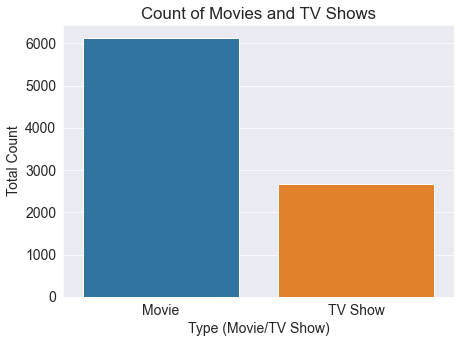

In [50]:
plt.figure(figsize=(7,5))
g = sns.countplot(df.type);
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

Above graph clearly depicts the ratio of Movies to TV shows in our dataset

Now we want to know how many number of Movies and TV shows have been added each year to the platform

In [51]:
# For movies

movies_year_df = movies_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movies_year_df.sort_values(by =['year'], inplace = True)

In [52]:
# for TV shows

shows_year_df = shows_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
shows_year_df.sort_values(by =['year'], inplace = True)

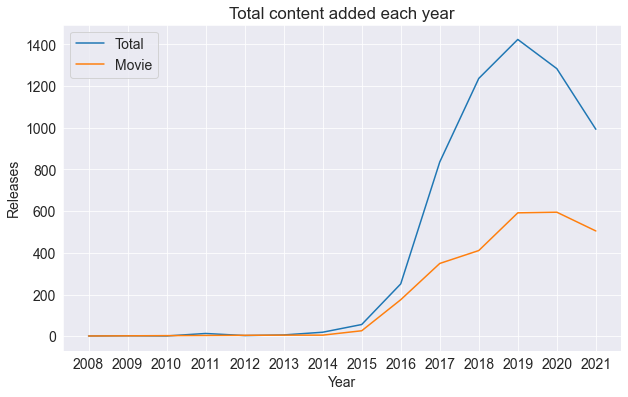

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=movies_year_df, x='year', y='count')
sns.lineplot(data=shows_year_df, x='year', y='count')
plt.title("Total content added each year")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Above Graph clearly depicts number of TV shows and movies increased 2014 onwards but still there are more number movies than TV shows. we can also plot seperate graphs for both the category.

In [54]:
import plotly.express as px

fig = px.line(movies_year_df, x="year", y="count", title='Year wise movies')
fig.show();

<AxesSubplot:xlabel='rating', ylabel='count'>

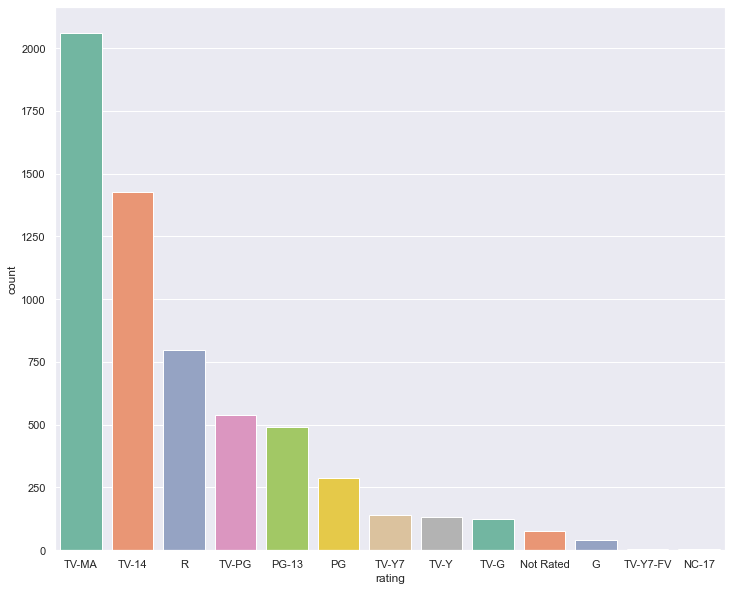

In [55]:
#MOVIES RATINGS
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="rating", data= movies_df, palette="Set2", order=movies_df['rating'].value_counts().index[0:15])

<AxesSubplot:xlabel='rating', ylabel='count'>

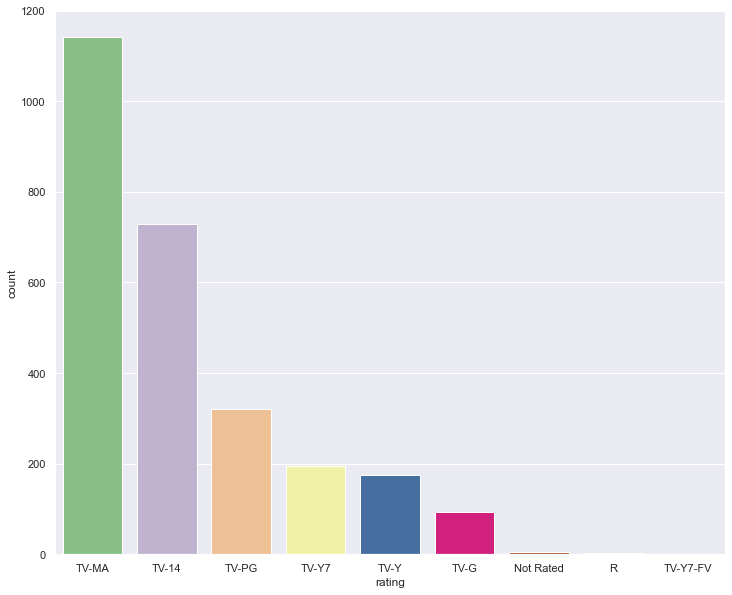

In [56]:
# TV SHOWS RATINGS
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="rating", data=shows_df, palette="Accent", order=shows_df['rating'].value_counts().index[0:15])

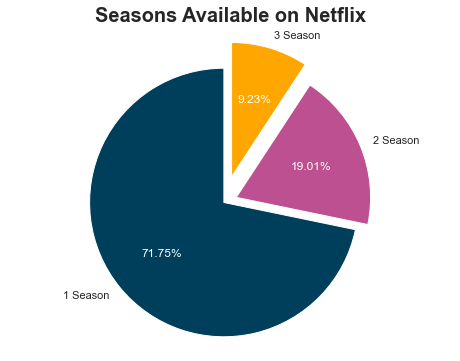

In [57]:
# TV SHOWS AND THEIR SEASONS
plt.figure(figsize=(8, 6))
labels=['1 Season', '2 Season', '3 Season']
_, _, texts = plt.pie(df1.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1, 0.2), colors=['#003f5c', '#bc5090', '#ffa600'])
plt.axis('equal')
plt.title('Seasons Available on Netflix', fontsize=20, fontweight='bold');
for text in texts:
    text.set_color('white')

In [58]:
df['category'] = df['category'].apply(lambda x: x.split(",")[0])

C:\Users\hp\AppData\Local\Temp/ipykernel_19260/3922364661.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
columns=['category','country']
category_country = df[columns]

In [67]:
size=category_country['category'].value_counts().tolist()
size

[1599,
 1210,
 859,
 829,
 773,
 605,
 399,
 385,
 334,
 275,
 252,
 220,
 174,
 128,
 120,
 119,
 80,
 67,
 65,
 53,
 39,
 34,
 32,
 21,
 20,
 20,
 18,
 16,
 13,
 12,
 11,
 3,
 2,
 1,
 1,
 1]

In [68]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


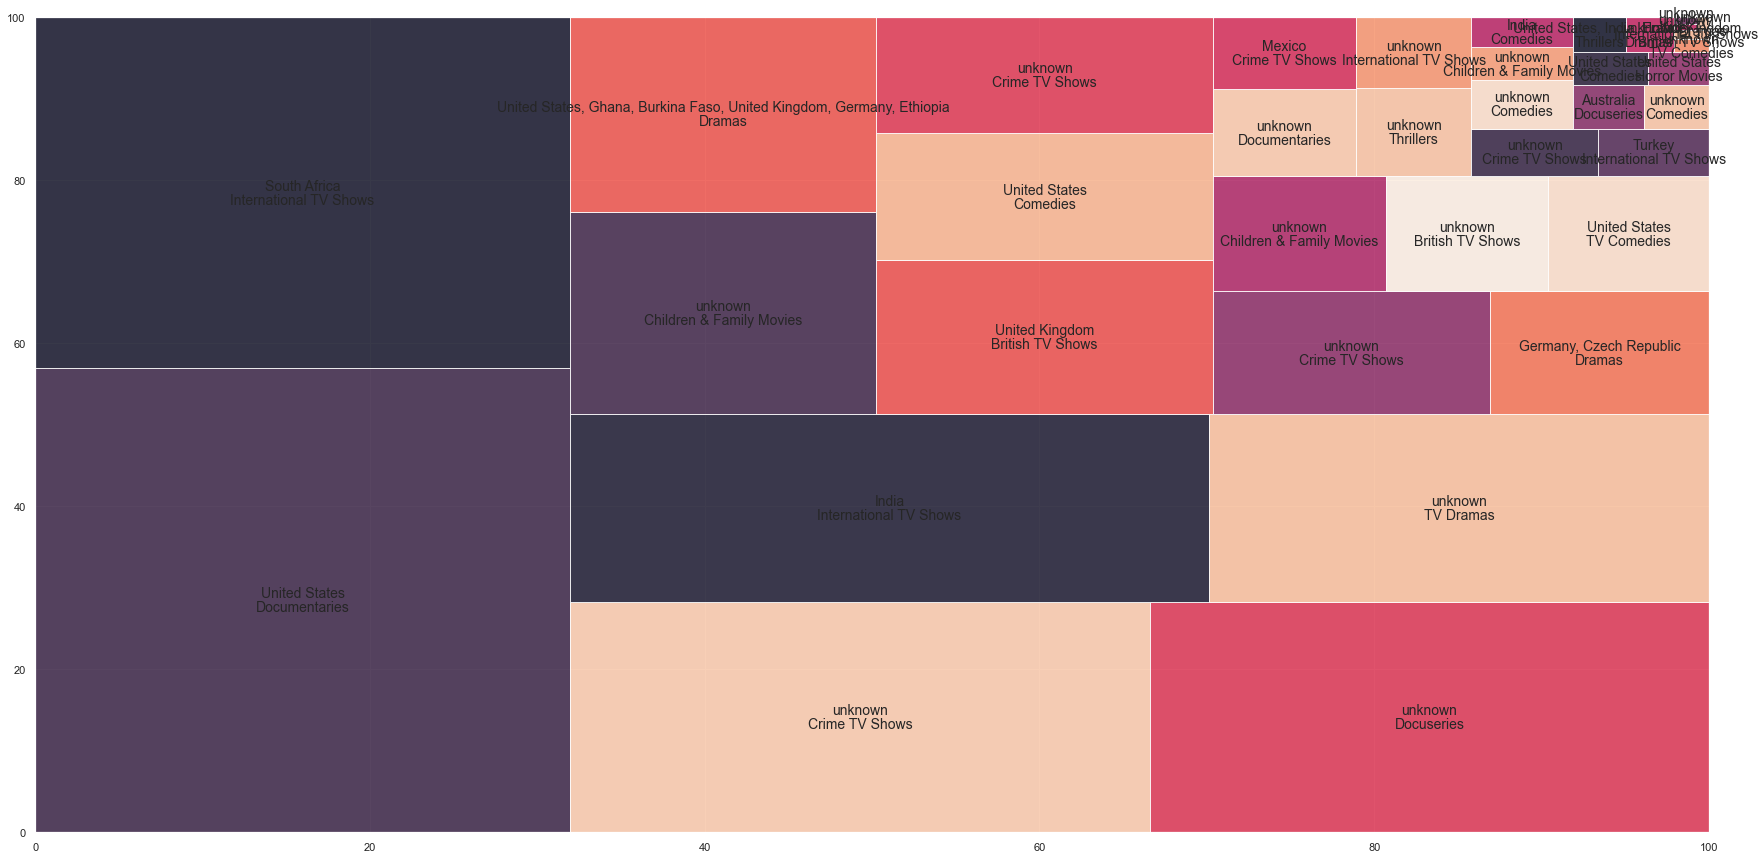

In [72]:
import squarify
plt.figure(figsize=(30,15))
squarify.plot(value= category_country['category'], label= category_country['country'], sizes= size, alpha=0.8)
plt.rc('font', size=14)
plt.show()

In [58]:
fig = px.line(shows_year_df, x="year", y="count", title='Year wise shows')
fig.show();

##  Plotting histogram using release_year

<AxesSubplot:ylabel='Frequency'>

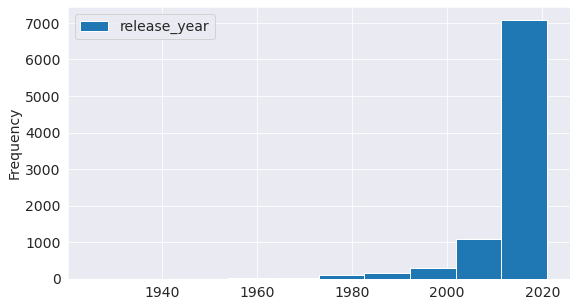

In [59]:
#df.hist(bins=10);
#df.plot(kind="hist");
df.plot.hist()

# Asking Questions

## 1. Which country has released highest no. of shows?

In [69]:
df.country.value_counts()

United States                                                                          2809
India                                                                                   972
unknown                                                                                 829
United Kingdom                                                                          418
Japan                                                                                   243
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Norway, Germany                                                                 

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Japan'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Mexico')])

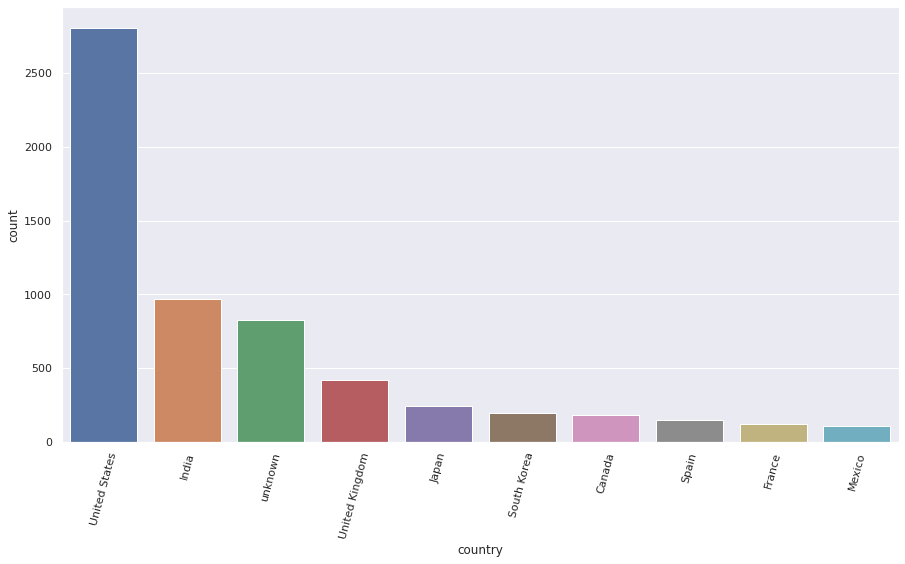

In [70]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(df.country,order=df.country.value_counts().index[0:10])
plt.xticks(rotation=75)

**INSIGHTS**

* United States has provided highest number of shows to Netflix.
* Maxico has provided least number of shows to Netflix.
 

##  2. Which month has registered highest number of release ?

In [71]:
df['release_month'] = df['date_added'].apply(lambda x: x.split()[0])

/tmp/ipykernel_35/2907193896.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
df.release_month.value_counts()

July         827
December     812
September    769
April        763
October      760
August       754
March        741
January      737
June         728
November     705
May          632
February     562
Name: release_month, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'July'),
  Text(1, 0, 'December'),
  Text(2, 0, 'September'),
  Text(3, 0, 'April'),
  Text(4, 0, 'October'),
  Text(5, 0, 'August'),
  Text(6, 0, 'March'),
  Text(7, 0, 'January'),
  Text(8, 0, 'June'),
  Text(9, 0, 'November')])

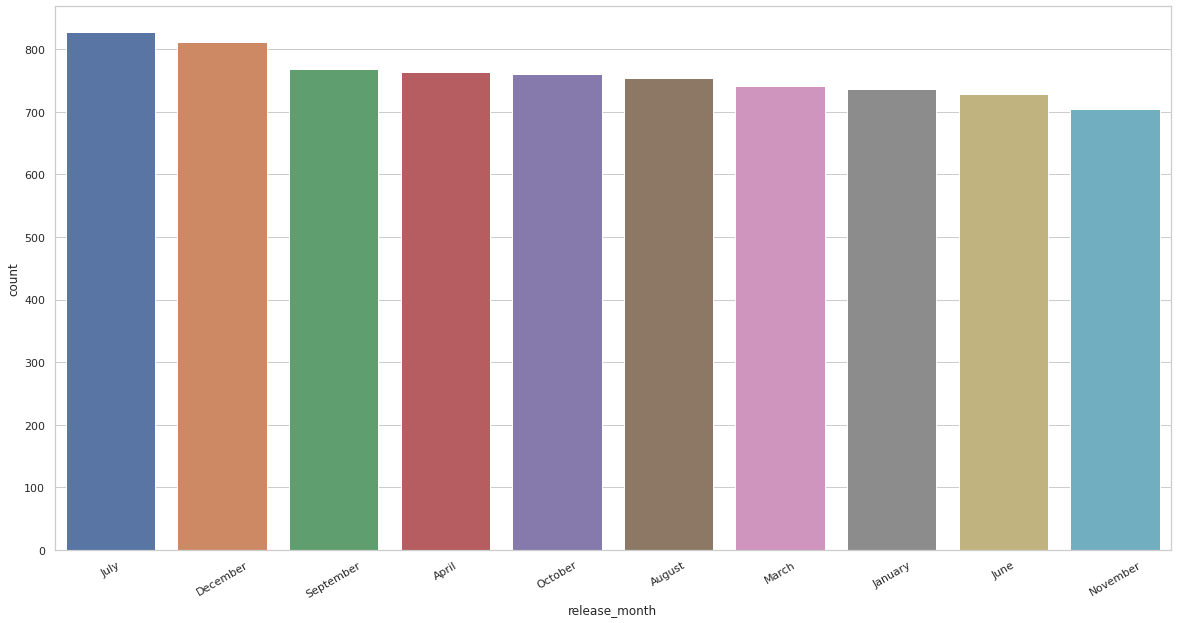

In [73]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.countplot(df.release_month,order=df.release_month.value_counts().index[0:10])
plt.xticks(rotation=30)

**INSIGHT**

Most of the shows have release date in month of July[827]  and December[812], where Februry [562] is the least preferred month for release.


## 3. Which type of content is created more ?

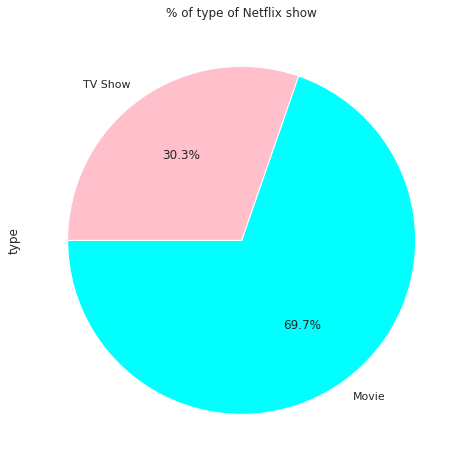

In [74]:
df_pie=df.type.value_counts()
plt.figure(figsize=(10,8))
plt.title("% of type of Netflix show")
df_pie.plot(kind="pie",colors=["cyan","pink"],labels=df.type.value_counts().index,autopct='%1.1f%%',startangle=180);

**INSIGHT**

Netflix provides approx 30% TV shows and 70% movies of its total contents.



## 4. What is the variation of type of show by country ?

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Japan'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Mexico')])

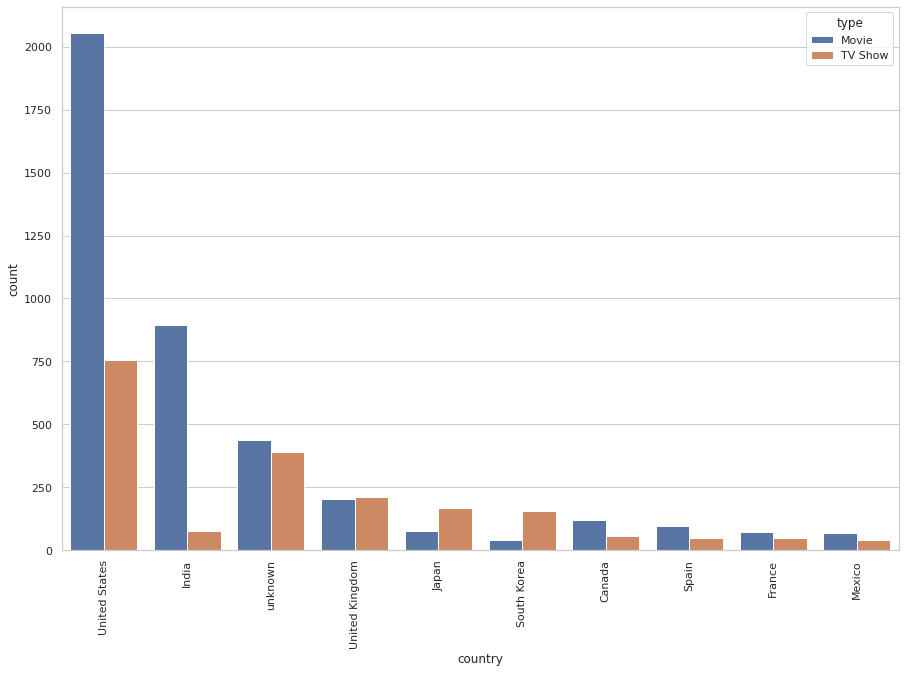

In [75]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.countplot(df.country,hue=df.type,order=df.country.value_counts().index[0:10])
plt.xticks(rotation=90)

**INSIGHT**

Above graph represents relationship between number of movies and tv shows provided by each country seperately and as we can see US has highest number of movies as well as tv shows. 
 

## 5. How the content added by Netflix has changed over time ??

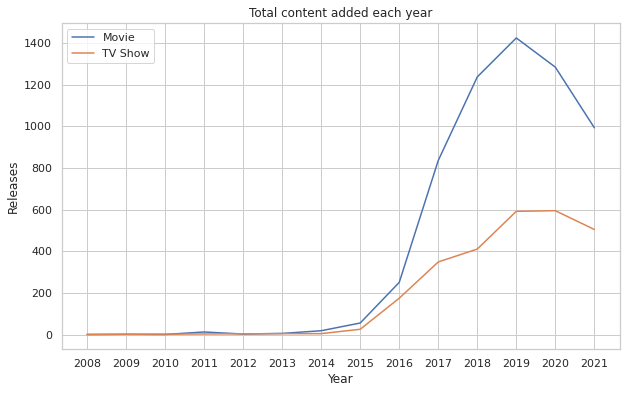

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=movies_year_df, x='year', y='count')
sns.lineplot(data=shows_year_df, x='year', y='count')
plt.title("Total content added each year")
plt.legend(['Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

In [77]:
fig = px.line(movies_year_df, x="year", y="count", title='Year wise movies')
fig.show()

In [79]:
fig = px.line(shows_year_df, x="year", y="count", title='Year wise shows')
fig.show()

**INSIGHTS**
 
 * Netflix has increased number of movies and TV shows 2015 onwards.
 * In 2019 highest number of movies were released.
 * In 2019 & 2020 highest number of shows were added to the platform.


## 6. Visualize the types of rating on Netflix show and compare their frequency ?

In [80]:
rating_per=df.rating.value_counts()*100/df.rating.count()
rating_per

TV-MA        36.461889
TV-14        24.539249
TV-PG         9.795222
R             9.089875
PG-13         5.574516
TV-Y7         3.788396
TV-Y          3.481229
PG            3.265074
TV-G          2.502844
Not Rated     0.932878
G             0.466439
TV-Y7-FV      0.068259
NC-17         0.034130
Name: rating, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



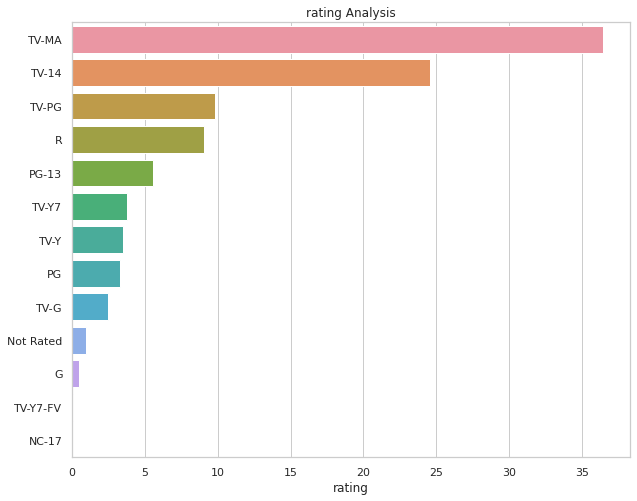

In [81]:
plt.figure(figsize=(10,8))
plt.title("rating Analysis")
plt.xlabel("percentage");
sns.barplot(rating_per,rating_per.index);

**INSIGHT**

TV-MA and TV-14 have provided rating to most of shows on Netflix; total of 61 %.


## 7. In which year and month Netflix began to increase their content count?

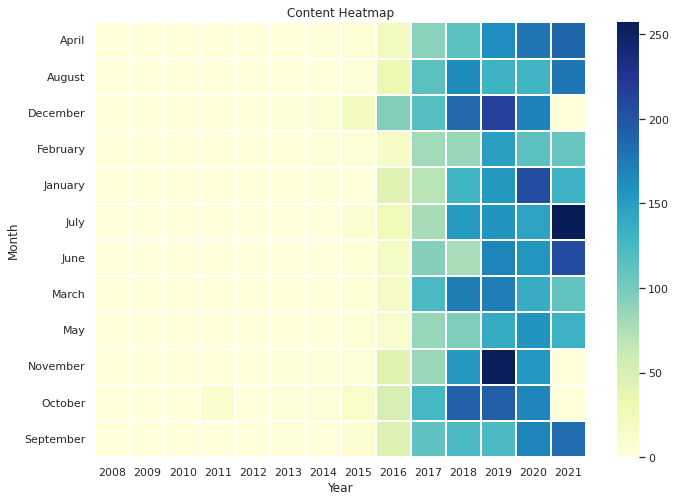

In [82]:
month_year_df =df.groupby('year_added')['release_month'].value_counts().unstack().fillna(0).T
plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

Let us save and upload our work to Jovian before continuing

In [83]:
import jovian

In [84]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tripti-bhati02/neflix-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/tripti-bhati02/neflix-data-analysis


'https://jovian.ai/tripti-bhati02/neflix-data-analysis'

## 8. Who are the top 10 actors on Netflix based on number of titles?

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



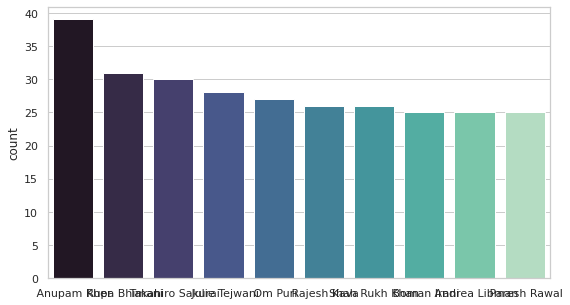

In [85]:
cast1=df[df.cast!="unknown"].set_index("title").cast.str.split(',',expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(cast1,order=cast1.value_counts().index[:10],palette="mako")
plt.show()

In [86]:
cast1.value_counts()

 Anupam Kher              39
 Rupa Bhimani             31
 Takahiro Sakurai         30
 Julie Tejwani            28
 Om Puri                  27
                          ..
 Song Young-kyu            1
 Kim Ho-jung               1
 Ju Ji-hoon                1
Kim Hye-soo                1
 Chittaranjan Tripathy     1
Length: 39248, dtype: int64

**INSIGHTS**

* Mr. Anupam kher is the top actor in the list.he has worked total of 39 shows of Netflix.
* Song Young-kyu, Kim Ho-jung, Ju Ji-hoon, Kim Hye-soo, Chittaranjan Tripathy etc. are some actors who have worked only in one show/movie.
 

## 9. How can we compare International Movies with International TV Shows?

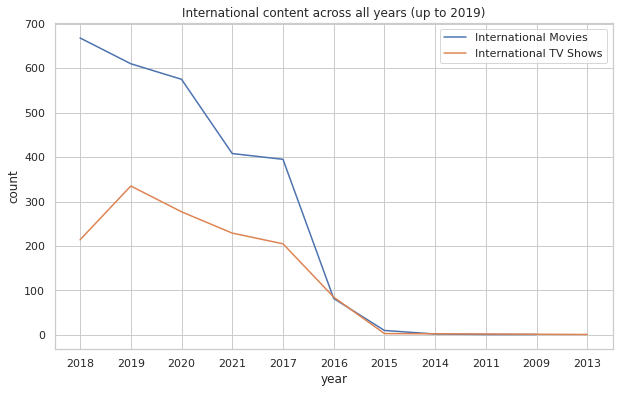

In [87]:
international_movies =df[df['category'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
international_shows = df[df['category'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
plt.title("International content across all years (up to 2019)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

In [88]:
intmov_year

year  count
0  2018    668
1  2019    610
2  2020    575
3  2021    408
4  2017    395
5  2016     82
6  2015     10
7  2014      2
8  2011      1
9  2009      1

In [89]:
intshow_year

year  count
0  2019    335
1  2020    277
2  2021    229
3  2018    214
4  2017    205
5  2016     85
6  2015      3
7  2013      1

**INSIGHTS**

* International MOvies have increased rapidly from year 2015 and in 2018 highest no. of movies got released/added.
* International TV shows have increased from 2015 and in 2019 highest no. of TV shows got released/added.


## 10. Who are the top 10 directors on Netflix with the most releases?

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



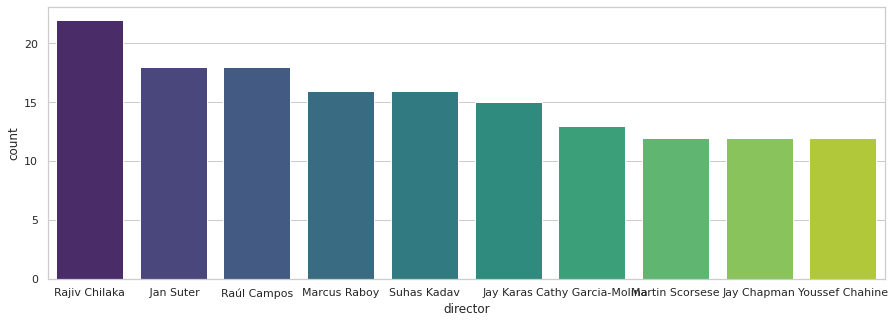

In [90]:
plt.figure(figsize=(15,5))
direct=df[df.director!="unknown"].set_index("title").director.str.split(",", expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(direct,order=direct.value_counts().index[:10],palette="viridis")
plt.xlabel("director")
plt.show()

In [91]:
direct.value_counts()

Rajiv Chilaka       22
 Jan Suter          18
Raúl Campos         18
Marcus Raboy        16
Suhas Kadav         16
                    ..
Eric Bross           1
Will Eisenberg       1
Marina Seresesky     1
Kenny Leon           1
Mozez Singh          1
Length: 5118, dtype: int64

**INSIGHT**

* Mr. Rajiv Chilaka has directed highest number of movies/Tv shows.

 ## 11. What type of shows has more of Kids' shows on Netflix

In [124]:
kids_df = df[(df["category"] == "Kids' TV")| (df["category"]=="Children & Family Movies, Comedies")].reset_index()
kids_df[["title", "country", "type", "release_year"]].head()

title         country     type  release_year
0  Confessions of an Invisible Girl         unknown    Movie          2021
1           Tayo and Little Wizards         unknown  TV Show          2020
2                      Chhota Bheem           India  TV Show          2021
3                      Numberblocks  United Kingdom  TV Show          2021
4     Little Singham - Black Shadow         unknown    Movie          2021

In [128]:
kids_df["type"].value_counts()

TV Show    219
Movie      201
Name: type, dtype: int64

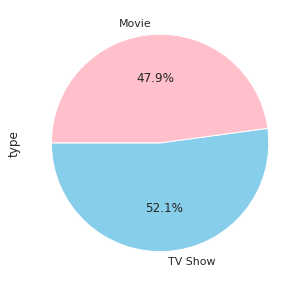

In [129]:
kids_df_pie=kids_df["type"].value_counts()
kids_df_pie.plot(kind="pie",colors=["skyblue","pink"],labels=kids_df.type.value_counts().index,autopct='%1.1f%%',startangle=180);

# Recommender System:

For this recommender system the content of the movie (cast, description, director,genre etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.


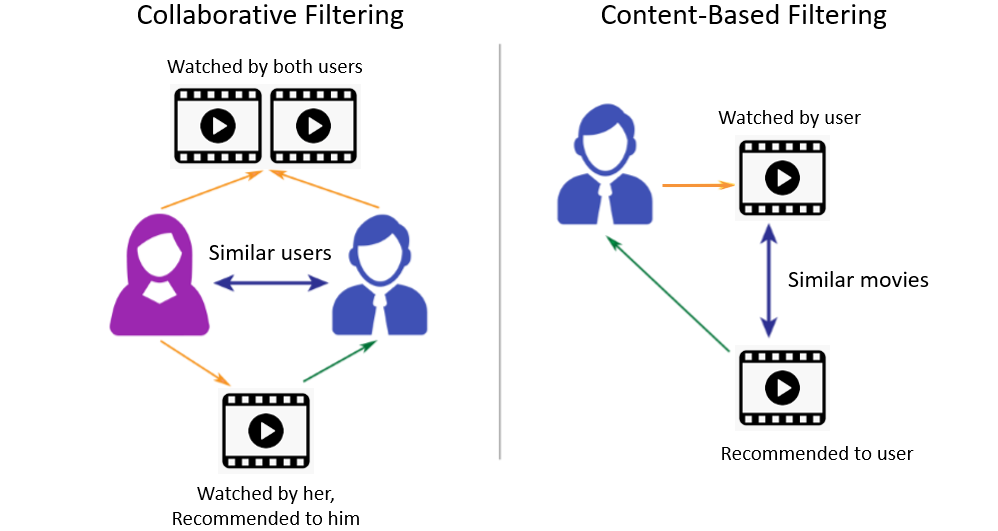


In [89]:
df=df[:6000]

In [90]:
df.description

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
5999    In 1979, single bohemian mom Dorothea, hoping ...
6000    Jeff's straight-and-narrow life changes abrupt...
6001    In one of history's greatest last stands, a ba...
6002    In the frozen tundra of a futuristic Arizona w...
6003    Revived by an experimental procedure, a hit ma...
Name: description, Length: 6000, dtype: object

We need to convert the word vector of each overview.We'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each description.The overall importance of each word to the documents in which they appear is equal to TF * IDF.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.



In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

In [92]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

In [95]:
#Output the shape of tfidf_matrix
tfidf_matrix.shape

(6000, 15437)

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [96]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [97]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [98]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [99]:
get_recommendations('#realityhigh')

385     How to Sell Drugs Online (Fast)
1707                A Very Special Love
3014                            Deadcon
4360                 The World Is Yours
468     The Guide to the Perfect Family
517                   Good Morning Call
5705                  The Violin Player
1884                Walk Away from Love
698                            Fan Girl
5655                    Chasing Cameron
Name: title, dtype: object

In [100]:
get_recommendations('PK')

3714                                        Unbroken
4221                           Merku Thodarchi Malai
906     Have You Ever Seen Fireflies? - Theatre Play
4306                                            ROMA
4569                        Harishchandrachi Factory
4565                              Ek Main Aur Ekk Tu
4700                         Bhavesh Joshi Superhero
2148                                    The Governor
2122                                        Stranger
351                       Team America: World Police
Name: title, dtype: object

# Multiple metrics(Genre,cast,director) based Recommender System
From the Genre,cast and director features, we need to extract the three most important actors, the director and genres associated with that movie.

In [101]:
features=['category','director','cast','description','title']
filters = df[features]
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(" ", ""))
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

C:\Users\hp\AppData\Local\Temp/ipykernel_19260/2456982649.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



category        director  \
0         documentaries  kirstenjohnson   
1  internationaltvshows         unknown   
2          crimetvshows  julienleclercq   
3            docuseries         unknown   
4  internationaltvshows         unknown   

                                                cast  \
0                                            unknown   
1  amaqamata,khosingema,gailmabalane,thabangmolab...   
2  samibouajila,tracygotoas,samueljouy,nabihaakka...   
3                                            unknown   
4  mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...   

                                         description                title  
0  asherfathernearstheendofhislife,filmmakerkirst...    dickjohnsonisdead  
1  aftercrossingpathsataparty,acapetownteensetsou...          blood&water  
2  toprotecthisfamilyfromapowerfuldruglord,skille...            ganglands  
3  feuds,flirtationsandtoilettalkgodownamongthein...  jailbirdsneworleans  
4  inacityofcoachingcentersknowntotrainindia’sfin...          kotafactory

In [102]:
def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['category']+' '+ x['description']

In [103]:
filters['soup'] = filters.apply(create_soup, axis=1)

C:\Users\hp\AppData\Local\Temp/ipykernel_19260/3901758875.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF.

In [104]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

In [105]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [106]:
filters

category             director  \
0            documentaries       kirstenjohnson   
1     internationaltvshows              unknown   
2             crimetvshows       julienleclercq   
3               docuseries              unknown   
4     internationaltvshows              unknown   
...                    ...                  ...   
5999                dramas            mikemills   
6000              comedies  jonlucas,scottmoore   
6001  internationaltvshows              unknown   
6002      action&adventure           joeycurtis   
6003      action&adventure            briansmrz   

                                                   cast  \
0                                               unknown   
1     amaqamata,khosingema,gailmabalane,thabangmolab...   
2     samibouajila,tracygotoas,samueljouy,nabihaakka...   
3                                               unknown   
4     mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...   
...                                                 ...   
5999  annettebening,ellefanning,gretagerwig,lucasjad...   
6000  milesteller,skylarastin,justinchon,sarahwright...   
6001                      lukekenny,mohitraina,mukuldev   
6002  paulsidhu,arielleholmes,brandencoles,kelceywat...   
6003  ethanhawke,xuqing,paulanderson,rutgerhauer,tyr...   

                                            description  \
0     asherfathernearstheendofhislife,filmmakerkirst...   
1     aftercrossingpathsataparty,acapetownteensetsou...   
2     toprotecthisfamilyfromapowerfuldruglord,skille...   
3     feuds,flirtationsandtoilettalkgodownamongthein...   
4     inacityofcoachingcentersknowntotrainindia’sfin...   
...                                                 ...   
5999  in1979,singlebohemianmomdorothea,hopingtohelph...   
6000  jeff'sstraight-and-narrowlifechangesabruptlywh...   
6001  inoneofhistory'sgreatestlaststands,abattaliono...   
6002  inthefrozentundraofafuturisticarizonawherehuma...   
6003  revivedbyanexperimentalprocedure,ahitmangetsto...   

                          title  \
0             dickjohnsonisdead   
1                   blood&water   
2                     ganglands   
3           jailbirdsneworleans   
4                   kotafactory   
...                         ...   
5999           20thcenturywomen   
6000                    21&over   
6001  21sarfarosh:saragarhi1897   
6002         2307:winter'sdream   
6003              24hourstolive   

                                                   soup  
0     kirstenjohnson unknown documentaries asherfath...  
1     unknown amaqamata,khosingema,gailmabalane,thab...  
2     julienleclercq samibouajila,tracygotoas,samuel...  
3     unknown unknown docuseries feuds,flirtationsan...  
4     unknown mayurmore,jitendrakumar,ranjanraj,alam...  
...                                                 ...  
5999  mikemills annettebening,ellefanning,gretagerwi...  
6000  jonlucas,scottmoore milesteller,skylarastin,ju...  
6001  unknown lukekenny,mohitraina,mukuldev internat...  
6002  joeycurtis paulsidhu,arielleholmes,brandencole...  
6003  briansmrz ethanhawke,xuqing,paulanderson,rutge...  

[6000 rows x 6 columns]

In [107]:
# Reset index of our main DataFrame and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [109]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [110]:
get_recommendations_new('PK', cosine_sim2)

1114                           3 Idiots
3915                     Mumbai Matinee
4790                  Anthony Kaun Hai?
1115                 Ferrari Ki Sawaari
1423                       BluffMaster!
195     EMI: Liya Hai To Chukana Padega
1022                   Taare Zameen Par
2720                            Dostana
3334                              Drive
4427                    Chance Pe Dance
Name: title, dtype: object

In [113]:
get_recommendations_new('Chennai Express', cosine_sim2)

5617                               Happy New Year
5616                                      Dilwale
207     Mission Istaanbul: Darr Ke Aagey Jeet Hai
1679                                      Singham
2713                                  Sol Levante
3134                                        Don 2
5571                                        Asoka
3133                                          Don
4952                                 Main Hoon Na
5460                     Oh Darling Yeh Hai India
Name: title, dtype: object

**INSIGHT**

* For kids more Tv shows(52.1%) than movies(47.9%) are available.


In [130]:
import jovian

In [131]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tripti-bhati02/neflix-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/tripti-bhati02/neflix-data-analysis


'https://jovian.ai/tripti-bhati02/neflix-data-analysis'

## Inferences and Conclusion

1. United States and Maxico has the highest number and lowest number of Tv shows and movies provided by Netflix respectively.
2. content addition has gradually increased 2014 onwards.
3. There are more of Moives on Netflix than Tv series. And more of them are movies rated by TV-MA and TV-14. 
4. Netflix has more Tv shows for kids than movies.
Most moives on netflix have the duration of 70 to 120 minutes which can be generally accepted by viewers.
Netflix provides more of drama and comedy shows which could be as a result of viewers' interest.
5. Most movies' directors prefer to released their movies on July and December.
6. Anupam Kher had acted in highest number of shows and Rajiv Chilaka  has directecd highest number of shows.

In [132]:
import jovian

In [133]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tripti-bhati02/neflix-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/tripti-bhati02/neflix-data-analysis


'https://jovian.ai/tripti-bhati02/neflix-data-analysis'

## References and Future Work
There's plenty of information to be discovered using this dataset. Here are some ideas for further exploration:

1. There should be a better cleaning method for director and cast column which will lead to more analysis;
2. Which TV show(s) have the highest number of seasons, etc
3. Which category of show has developed most and least interest of audiences.

References:
Data Analysis with Python: Zero to Pandas: http://jovian.ml/learn/data-analysis-with-python-zero-to-pandas
opendatasets Python library: https://github.com/JovianML/opendatasets
Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
For error correction https://stackoverflow.com

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [134]:
import jovian

In [135]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tripti-bhati02/neflix-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/tripti-bhati02/neflix-data-analysis


'https://jovian.ai/tripti-bhati02/neflix-data-analysis'